In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytz import timezone

tzinfo = timezone("America/Sao_Paulo")

start = pd.Timestamp(
    year=2020, month=1, day=31, hour=11, minute=22, second=30, tzinfo=tzinfo
).tz_convert(None)
end = pd.Timestamp(
    year=2020, month=1, day=31, hour=13, minute=30, second=0, tzinfo=tzinfo
).tz_convert(None)

df = pd.read_csv("../../../models/2020/boat_data_1s.csv")
# df = pd.read_csv("../../../models/2020/boat_data_100ms.csv")
df["timestamp"] = pd.DatetimeIndex(df["timestamp"]).tz_convert(None)
df = df.set_index("timestamp")
print(df.columns)

Index(['Unnamed: 0', 'bat_i', 'bat_ii', 'bat_io', 'bat_pi', 'bat_po', 'bat_p',
       'bat_v', 'bat1_v', 'bat2_v', 'bat3_v', 'boat_on', 'dms_on', 'esc_dt',
       'esc_ii', 'esc_pi', 'esc_po', 'esc_vi', 'esc_vo', 'mcb_po', 'mcb1_dt',
       'mcb1_io', 'mcb1_po', 'mcb1_vi', 'mcb1_vo', 'mcb2_dt', 'mcb2_io',
       'mcb2_po', 'mcb2_vi', 'mcb2_vo', 'motor_ii', 'motor_on', 'motor_pi',
       'motor_po', 'motor_rpm', 'motor_torq', 'motor_vi', 'mppt_io', 'mppt_pi',
       'mppt_po', 'mppt_vo', 'mppt1_dt', 'mppt1_ii', 'mppt1_pi', 'mppt1_vi',
       'mppt1_vo', 'mppt2_dt', 'mppt2_ii', 'mppt2_pi', 'mppt2_vi', 'mppt2_vo',
       'mppt3_dt', 'mppt3_ii', 'mppt3_pi', 'mppt3_vi', 'mppt3_vo', 'mppt4_dt',
       'mppt4_ii', 'mppt4_pi', 'mppt4_vi', 'mppt4_vo', 'prop_pi', 'prop_rpm',
       'prop_torq', 'solcast_AirTemp', 'solcast_energy', 'solcast_poa',
       'trans_pi', 'trans_po', 'trans_rpmi', 'trans_rpmo', 'trans_torqi',
       'trans_torqo'],
      dtype='object')


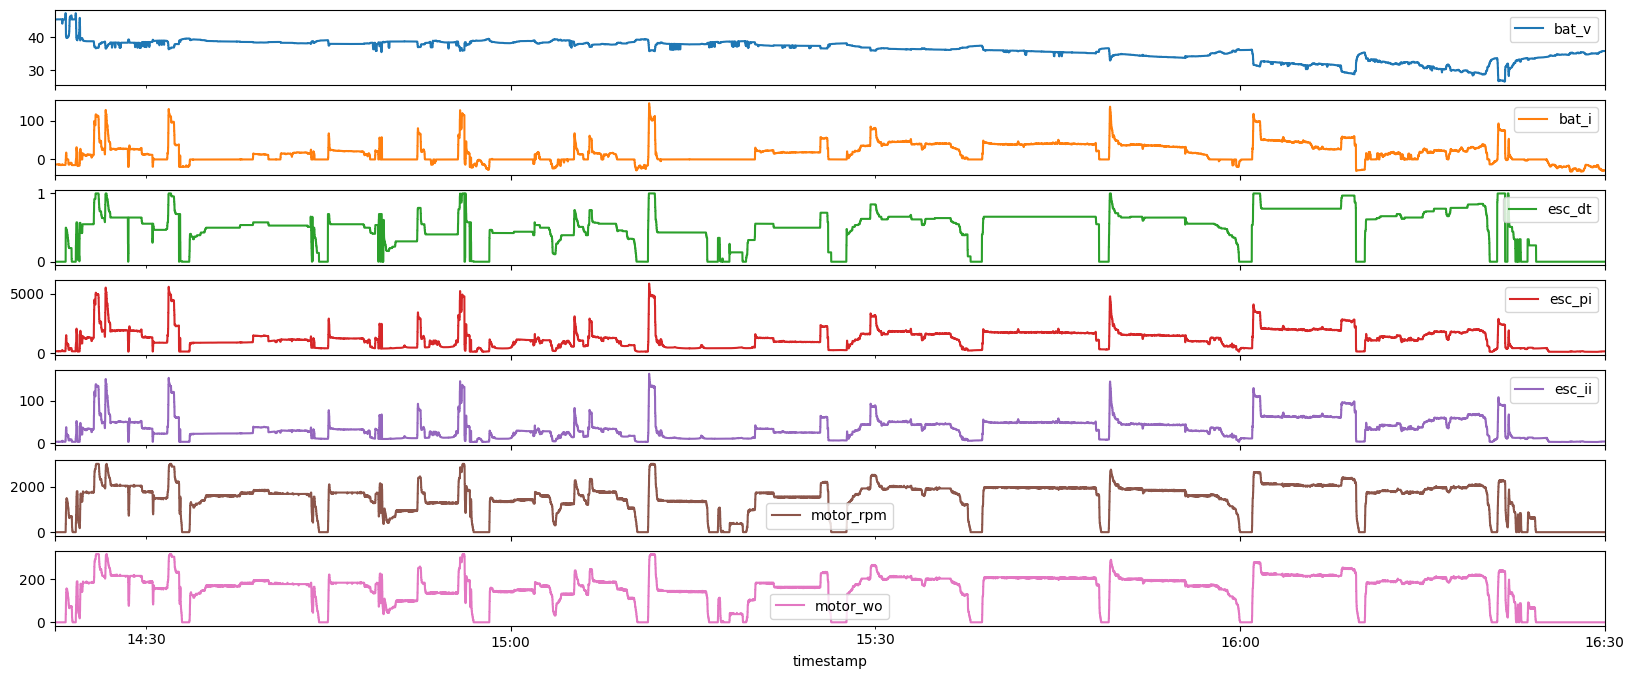

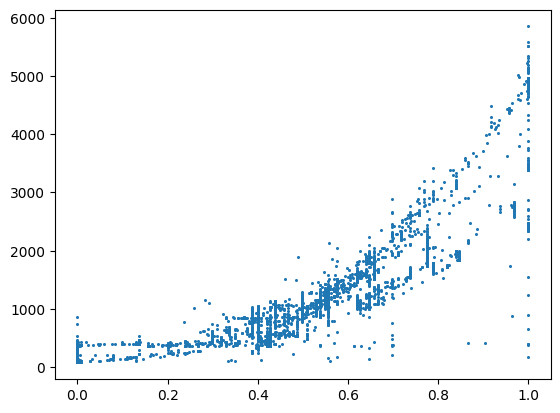

In [290]:
df = df.loc[
    (df.index >= start) & (df.index <= end),
    ["bat_v", "bat_i", "esc_dt", "esc_pi", "esc_ii", "motor_rpm"],
]
df['esc_dt'] = (df['motor_rpm'] != 0) * df['esc_dt']
df = df.interpolate(method="time")
df = df.resample('100ms').ffill()

rpm_to_radps = (2 * np.pi) / 60
df["motor_wo"] = df["motor_rpm"] * rpm_to_radps

df.plot(subplots=True, figsize=(20, 8))
plt.show()

plt.plot()
plt.scatter(df['esc_dt'], df['esc_pi'], s=0.2)

[9.91226732e-01 1.51345329e+01 9.86742643e+05]


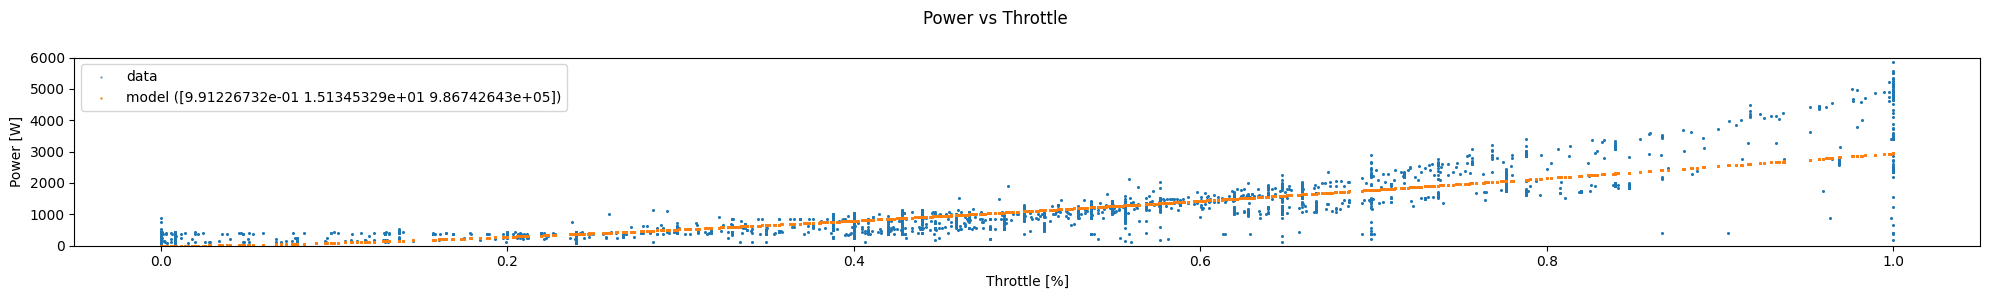

[]

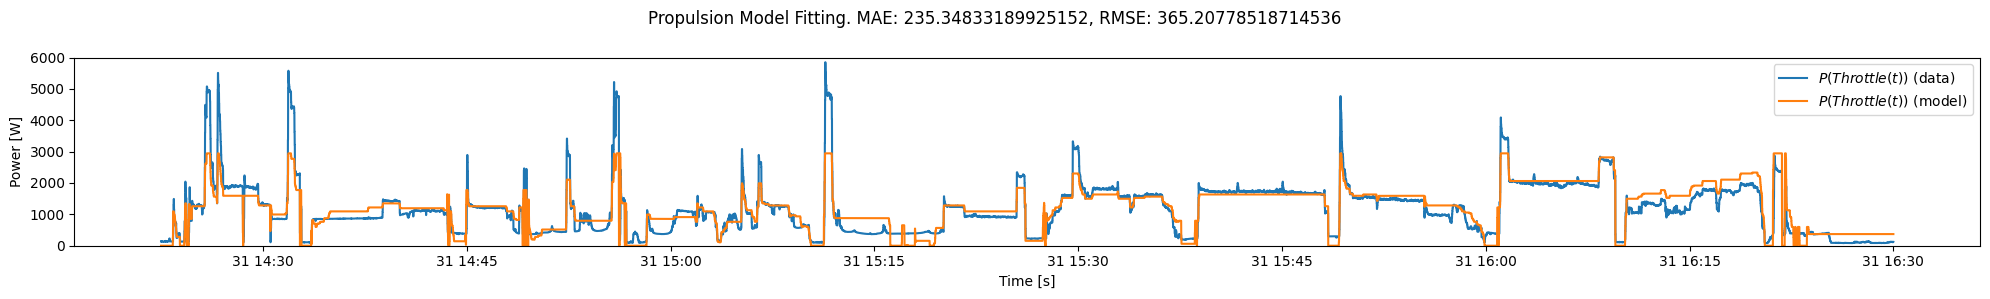

In [243]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from numpy import pi, sqrt

def esc_p_from_dt(esc_D,
                  prop_eff, prop_kT, hull_C):
    trans_eff = 0.95
    motor_eff = 0.8
    esc_eff = 0.8
    trans_K = 13 / 22
    motor_K = 0.10390329
    motor_R = 0.030
    esc_vi = df['bat_v'].mean()
    prop_D = 8.5 * 0.0254
    hull_S = 3.4
    motor_B = 0.2
    rho = 1025
    Abs = abs

    return 0.0625*(prop_D + sqrt((4.0*hull_S*hull_C + prop_D**2*pi)/pi))*(0.419973683298291*motor_B*hull_S*motor_R*hull_C*trans_eff*trans_K**4*prop_eff + 0.419973683298291*hull_S*motor_K**2*hull_C*trans_eff*trans_K**4*prop_eff - prop_D**(7/3)*motor_R**(1/3)*rho**(1/3)*(0.7937005259841*prop_D + 1.5874010519682*((hull_S*hull_C + 0.25*prop_D**2*pi)/pi)**0.5)*(-hull_S*motor_K*hull_C*trans_eff*prop_kT*trans_K**4*esc_D*esc_vi*prop_eff/(prop_D + 2.0*((hull_S*hull_C + 0.25*prop_D**2*pi)/pi)**0.5) + 0.5*hull_S**1.0*hull_C**1.0*trans_eff**1.0*trans_K**4.0*((0.0740740740740741*hull_S*hull_C*trans_eff*trans_K**4*(motor_B*motor_R + motor_K**2)**3*prop_eff + prop_D**7*motor_K**2*motor_R*rho*prop_kT**2*(0.5*prop_D + ((hull_S*hull_C + 0.25*prop_D**2*pi)/pi)**0.5)*esc_D**2*esc_vi**2)/(0.5*prop_D + ((hull_S*hull_C + 0.25*prop_D**2*pi)/pi)**0.5)**3)**0.5*Abs(prop_eff)**1.0/(prop_D**3.5*motor_R**0.5*rho**0.5))**(2/3))**4/(hull_S*prop_D**(35/3)*motor_R**(8/3)*hull_C*trans_eff*rho**(5/3)*prop_kT**(10/3)*trans_K**4*((-hull_S*motor_K*hull_C*trans_eff*trans_K**4*esc_D*esc_vi*prop_eff + 0.5*hull_S**1.0*hull_C**1.0*trans_eff**1.0*trans_K**4.0*((0.0740740740740741*hull_S*hull_C*trans_eff*trans_K**4*(motor_B*motor_R + motor_K**2)**3*prop_eff + prop_D**7*motor_K**2*motor_R*rho*prop_kT**2*(0.5*prop_D + ((hull_S*hull_C + 0.25*prop_D**2*pi)/pi)**0.5)*esc_D**2*esc_vi**2)/(0.5*prop_D + ((hull_S*hull_C + 0.25*prop_D**2*pi)/pi)**0.5)**3)**0.5*(prop_D + 2.0*((hull_S*hull_C + 0.25*prop_D**2*pi)/pi)**0.5)*Abs(prop_eff)**1.0/(prop_D**3.5*motor_R**0.5*rho**0.5*prop_kT**1.0))/(prop_D + 2.0*((hull_S*hull_C + 0.25*prop_D**2*pi)/pi)**0.5))**(4/3)*(0.5*prop_D + ((hull_S*hull_C + 0.25*prop_D**2*pi)/pi)**0.5)**4*esc_eff*motor_eff*prop_eff)


lower_bounds = [0.5, 1e-3, 0.1]
upper_bounds = [1.0, 1e+3, 1e6]
bounds = (lower_bounds, upper_bounds)
popt, _ = curve_fit(esc_p_from_dt, df['esc_dt'].to_numpy(), df['esc_pi'].to_numpy(), bounds=bounds)
print(popt)

esc_pi_hat = esc_p_from_dt(df['esc_dt'].to_numpy(), *popt)

df['esc_pi_hat'] = esc_pi_hat

rmse = (((df['esc_pi'].to_numpy() - esc_pi_hat)**2).sum() / len(df))**(1/2)
mae = abs(df['esc_pi'].to_numpy() - esc_pi_hat).sum() / len(df)

plt.figure(figsize=(20,3))
plt.scatter(df['esc_dt'], df['esc_pi'], label='data', s=0.2)
plt.scatter(df['esc_dt'], esc_pi_hat, label=f'model ({popt})', s=0.5)
plt.xlabel('Throttle [%]')
plt.ylabel('Power [W]')
plt.legend(loc=0)
plt.suptitle('Power vs Throttle')
plt.ylim([0,6000])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(df.index, df['esc_pi'], label='$P(Throttle(t))$ (data)')
plt.plot(df.index, esc_pi_hat, label='$P(Throttle(t))$ (model)')
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.legend(loc=1)
plt.suptitle(f"Propulsion Model Fitting. MAE: {mae}, RMSE: {rmse}")
plt.ylim([0,6000])
plt.tight_layout()
plt.plot()

In [413]:
import control as ct

class Propulsion:
    @classmethod
    def _update(cls, t, x, u, params: dict):
        # Parameters
        motor_R = params["motor_R"]
        motor_L = params["motor_L"]
        motor_B = params["motor_B"]
        motor_J = params["motor_J"]
        motor_K = params["motor_K"]
        trans_eff = params["trans_eff"]
        trans_K = params["trans_K"]
        prop_K = params["prop_K"]
        prop_D = params["prop_D"]
        rho = params["rho"]

        # States
        motor_i = x[0]
        motor_w = x[1]

        # Inputs
        esc_D = u[0]
        bat_V = u[1]

        # Compute ESC-Motor coupling
        motor_v = esc_D * bat_V

        # Compute Motor-Transmission-Propeller coupling
        # prop_w = motor_w * trans_K
        # prop_Q = prop_D**5 * rho * prop_K * prop_w**2
        # motor_load_Q = prop_Q * trans_K / trans_eff
        motor_load_Q = prop_D**5 * rho * prop_K * motor_w**2 * trans_K**3 / trans_eff

        # Compute Motor
        dwdt = (-motor_B*motor_w + motor_K*motor_i - motor_load_Q) / motor_J
        didt = (-motor_K*motor_w - motor_R*motor_i + motor_v) / motor_L

        return np.array([didt, dwdt])

    @classmethod
    def _output(cls, t, x, u, params: dict):
        # Parameters
        esc_eff = params["esc_eff"]

        # States
        motor_i = x[0]
        motor_w = x[1]

        # Inputs
        esc_D = u[0]

        # Compute Motor-ESC coupling
        esc_ii = esc_D * motor_i / esc_eff

        return np.array([esc_ii, motor_w])

    @classmethod
    def build(cls, params: dict):
        return ct.NonlinearIOSystem(
            cls._update,
            cls._output,
            name="propulsion",
            states=("motor_i", "motor_w"),
            inputs=("esc_D", "bat_V"),
            outputs=("esc_ii", "motor_w"),
            params=params,
        )


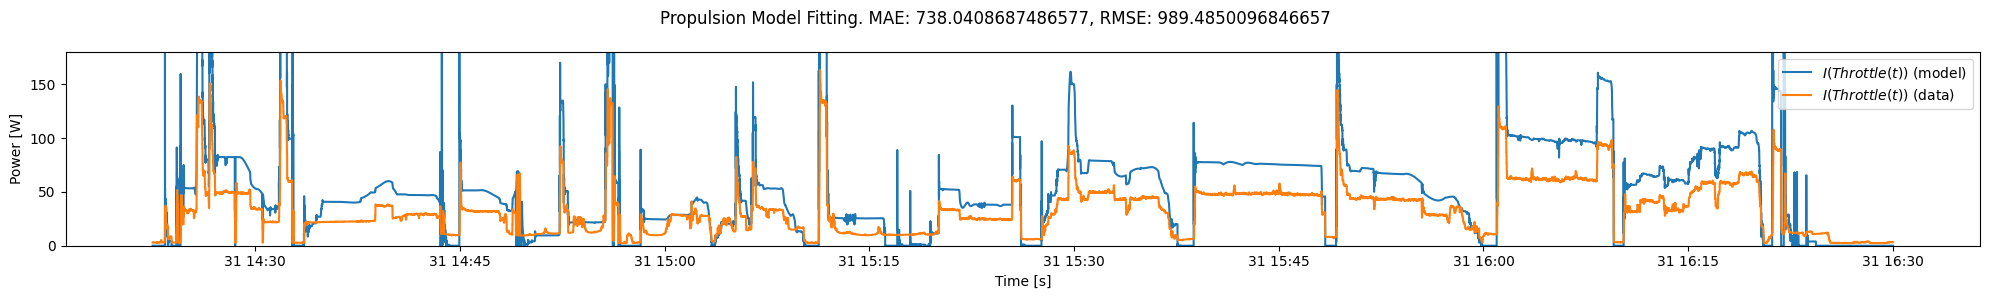

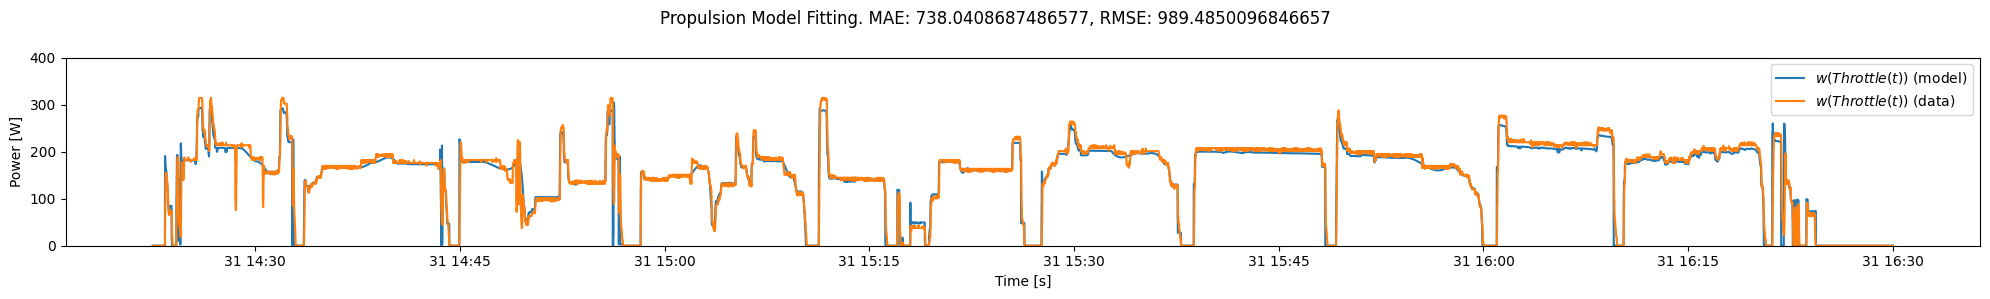

In [414]:
import lmfit

def residual(params, x, ydata=None, eps=None):
    T = x[0]
    D = x[1]
    Vbat = x[2]

    ymodel = ct.input_output_response(
        Propulsion.build(params.valuesdict()),
        T,
        U=[D, Vbat],
        solve_ivp_kwargs={"method": "Radau"},  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
    ).outputs.T

    if ydata is None:
        return ymodel

    res = np.array([ydata - ymodel]).flatten()

    if eps is None:
        return res

    return res / eps

# Decide initial guesses
motor_K_0 = 0.10361811
motor_R_0 = 0.03217869
motor_B_0 = 8.9560e-04
prop_D = 8.5 * 0.0254
trans_K = 13 / 22
trans_eff_0 = 0.95
rho = 1025
# From the Motor state equations:
#   dwdt = -motor_B*motor_w/motor_J + motor_K*motor_i/motor_J - motor_load_Q/motor_J
#   didt = -motor_K*motor_w/motor_L - motor_R*motor_i/motor_L + motor_v/motor_L
# The steady-state is:
#   0 = -motor_B*motor_w + motor_K*motor_i - motor_load_Q
#   0 = -motor_K*motor_w - motor_R*motor_i + motor_v
motor_v_mean = (df['bat_v'] * df['esc_dt']).mean()
motor_w_mean = df['motor_wo'].mean()
motor_i_mean = (motor_v_mean -motor_K_0*motor_w_mean) / motor_R_0
motor_load_Q_mean = motor_K_0*motor_i_mean - motor_B_0*motor_w_mean
# From the Propeller equation:
#   motor_load_Q = prop_D**5 * rho * prop_kT * motor_w**2 * trans_K**3 / trans_eff
prop_K_0 = (motor_load_Q_mean * trans_eff_0) / (prop_D**5 * rho * motor_w_mean**2 * trans_K**3)
# prop_K_0 = 13e-4

# Initialize the optimization parameters
params = lmfit.Parameters()
params.add_many(
    # NAME, VALUE, VARY, MIN,  MAX,  EXPR, BRUTE_STEP
    ("motor_R", motor_R_0, True, 0.01, 1, None, None),  # Motor Armature Resistance [Ω]
    ("motor_L", 28e-6, True, 1e-6, 1e-1, None, None),  # Motor Armature Inductance [Henrys]
    ("motor_B", motor_B_0, True, 1e-3, 0.05, None, None),  # Motor Mechanical Frictional coeffiecient [Nm/(rad/s)]
    ("motor_J", 2e-2, True, 1e-4, 1e-1, None, None),  # Motor Inertial moment [Kgm²]
    ("motor_K", motor_K_0, False, motor_K_0*0.99, motor_K_0*1.01, None, None),  # Motor Volt-revolution ratio [V/(rad/s)]
    ("prop_K", prop_K_0, True, prop_K_0/100, prop_K_0*100, None, None),  # Propeller torque coefficient
    ("prop_D", prop_D, False, prop_D*0.99, prop_D*1.01, None, None),  # Propeller Nominal Diameter (70% of the measured diameter) [m]
    ("trans_eff", trans_eff_0, False, 0.3, 1, None, None),
    ("esc_eff", 0.8, False, 0.3, 1, None, None),
    ("trans_K", trans_K, False, trans_K*0.99, trans_K*1.01, None, None),  # Transmission's gear ratio as `output speed / input speed`
    ("rho", rho, False, 1000, 1040, None, None),   # Water density [kg/m^3]
)
# display(params)

# Time array
T = (df.index[1] - df.index[0]).to_numpy().astype(np.float64) * 1e-9   # simulation time in seconds
lenT = len(df.index)
T = np.linspace(0, lenT * T, lenT)  # Recreate the time array because of numerical issues from the index datetime to float transformation

# Inputs and Optimization data
Vbat = df["bat_v"].to_numpy()
D = df["esc_dt"].to_numpy()
data = df[["esc_ii", "motor_wo"]].copy(deep=True)
data = data.to_numpy()

if True:
    propulsion = Propulsion.build(params.valuesdict())

    # Test initial parameters
    df_init = ct.input_output_response(
        Propulsion.build(params.valuesdict()),
        T,
        U=[D, Vbat],
        solve_ivp_kwargs={"method": "Radau"},
    ).to_pandas()


    df['esc_pi'] = df['esc_ii'] * df['bat_v']
    df_init['esc_pi'] = df_init['esc_ii'].to_numpy() * df['bat_v'].to_numpy()

    rmse = (((df['esc_pi'].to_numpy() - df_init['esc_pi'].to_numpy())**2).sum() / len(df))**(1/2)
    mae = abs(df['esc_pi'].to_numpy() - df_init['esc_pi'].to_numpy()).sum() / len(df)

    plt.figure(figsize=(20, 3))
    plt.plot(df.index, df_init['esc_ii'], label='$I(Throttle(t))$ (model)')
    plt.plot(df.index, df['esc_ii'], label='$I(Throttle(t))$ (data)')
    plt.xlabel('Time [s]')
    plt.ylabel('Power [W]')
    plt.legend(loc=1)
    plt.suptitle(f"Propulsion Model Fitting. MAE: {mae}, RMSE: {rmse}")
    plt.ylim([0,180])
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(20, 3))
    plt.plot(df.index, df_init['motor_w'], label='$w(Throttle(t))$ (model)')
    plt.plot(df.index, df['motor_wo'], label='$w(Throttle(t))$ (data)')
    plt.xlabel('Time [s]')
    plt.ylabel('Power [W]')
    plt.legend(loc=1)
    plt.suptitle(f"Propulsion Model Fitting. MAE: {mae}, RMSE: {rmse}")
    plt.ylim([0,400])
    plt.tight_layout()
    plt.show()

In [411]:
result = lmfit.minimize(
    residual,
    params,
    args=([T, D, Vbat], data),
    # https://lmfit.github.io/lmfit-py/fitting.html#choosing-different-fitting-methods
    method="least_squares",  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html
    **dict(
        # jac='3-point',
        # ftol=1e-12,
        # xtol=1e-12,
        loss='soft_l1',  # 4.55e-4, 24it
        # loss='huber',  # 4.34e-4, 21it
        # loss='cauchy',  # 4.39, 26it
        x_scale='jac',
        # diff_step=np.array([
        #     1e-04,
        #     1e-04,
        #     1e-04,
        #     1e-04,
        #     1e-01,
        # ]),
        # max_nfev=20,
    )
    # nan_policy='omit',  # drop missing data
    # method="differential_evolution",  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html
    # **dict(
    #     updating="deferred",
    #     disp=True,
    #     polish=True,
    #     workers=8,
    #     max_nfev=100_000,
    #     seed=1,
    #     # strategy="currenttobest1bin",
    #     strategy="randtobest1bin",
    # ),
)

result

In [ ]:
# df_init = ct.input_output_response(
#     Propulsion.build(params.valuesdict()),
#     T,
#     U=[D, Vbat],
#     solve_ivp_kwargs={"method": "Radau"},
# ).to_pandas()

df_best = ct.input_output_response(
    Propulsion.build(result.params.valuesdict()),
    T,
    U=[D, Vbat],
    solve_ivp_kwargs={"method": "Radau"},
).to_pandas()

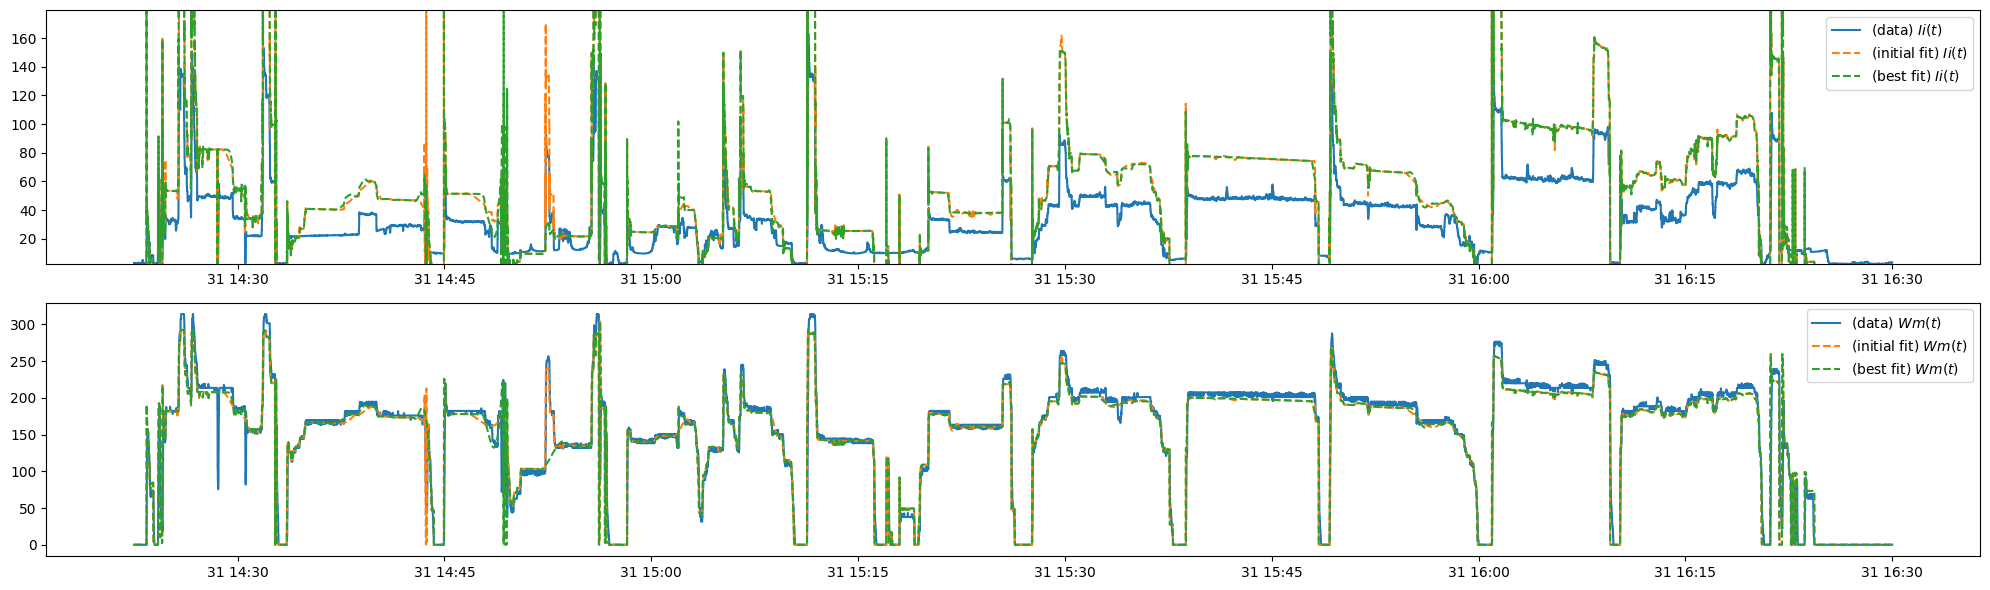

In [ ]:
fig, ax = plt.subplots(2, figsize=(20, 3 * 2))

ax[0].plot(df.index, df["esc_ii"], label="(data) $Ii(t)$")
ax[0].plot(df.index, df_init["esc_ii"], "--", label="(initial fit) $Ii(t)$")
ax[0].plot(df.index, df_best["esc_ii"], "--", label="(best fit) $Ii(t)$")
ax[0].set_ylim((df["esc_ii"].min()*1.1, df["esc_ii"].max()*1.1))
ax[0].legend(loc=1)

ax[1].plot(df.index, df["motor_wo"], label="(data) $Wm(t)$")
ax[1].plot(df.index, df_init["motor_w"], "--", label="(initial fit) $Wm(t)$")
ax[1].plot(df.index, df_best["motor_w"], "--", label="(best fit) $Wm(t)$")
ax[1].legend(loc=1)

plt.tight_layout()
plt.show()

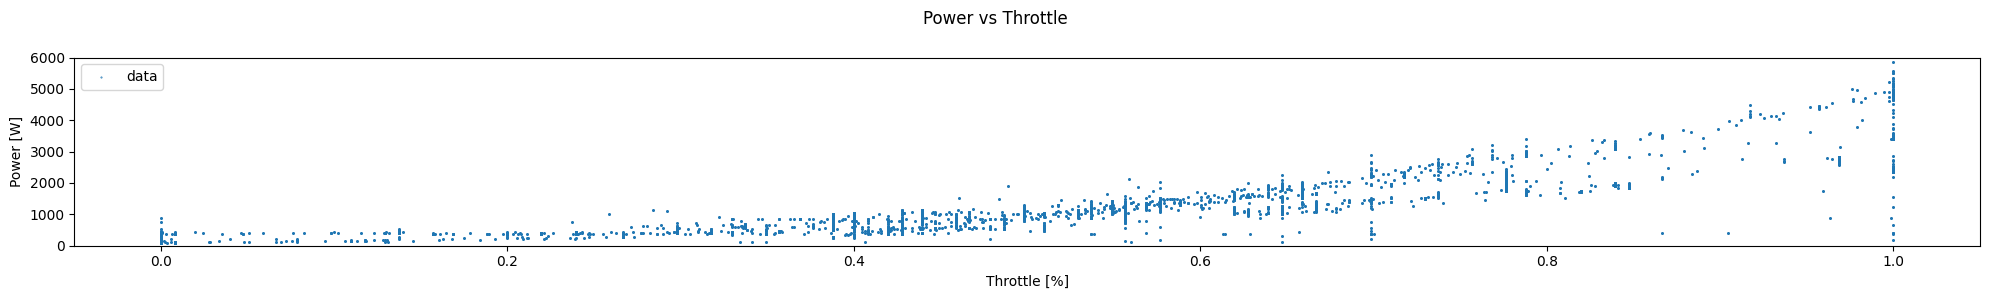

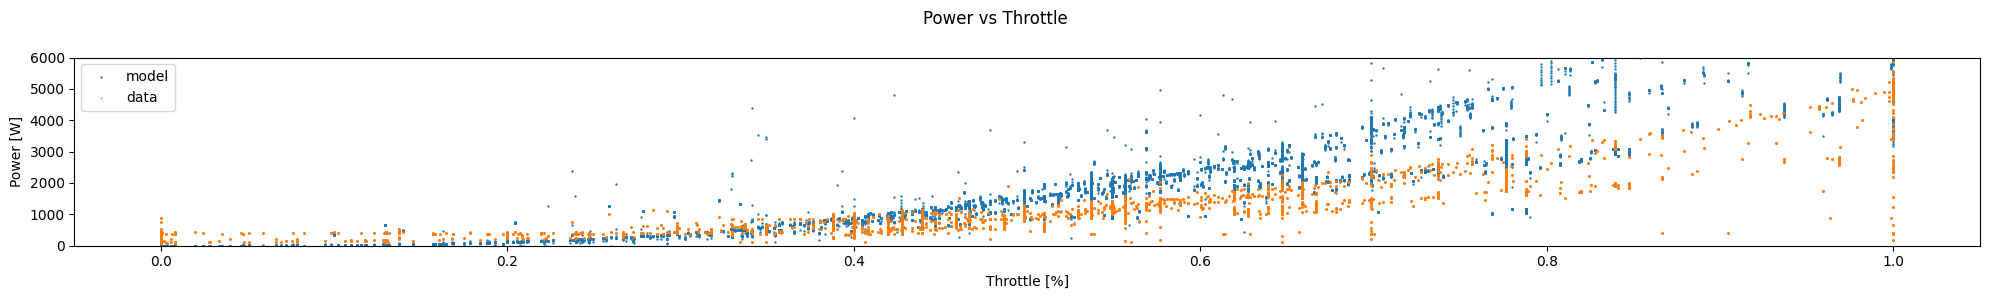

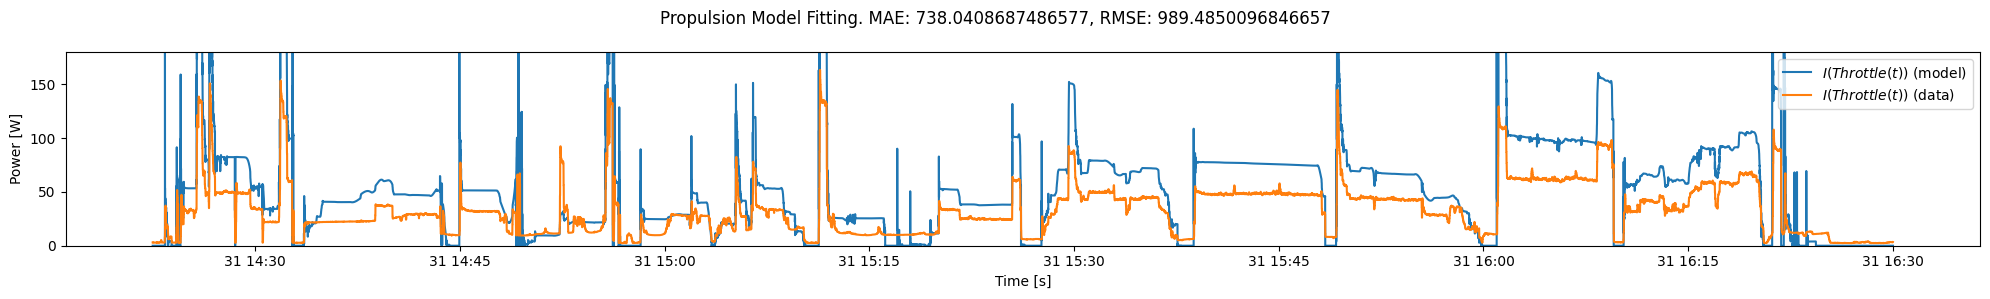

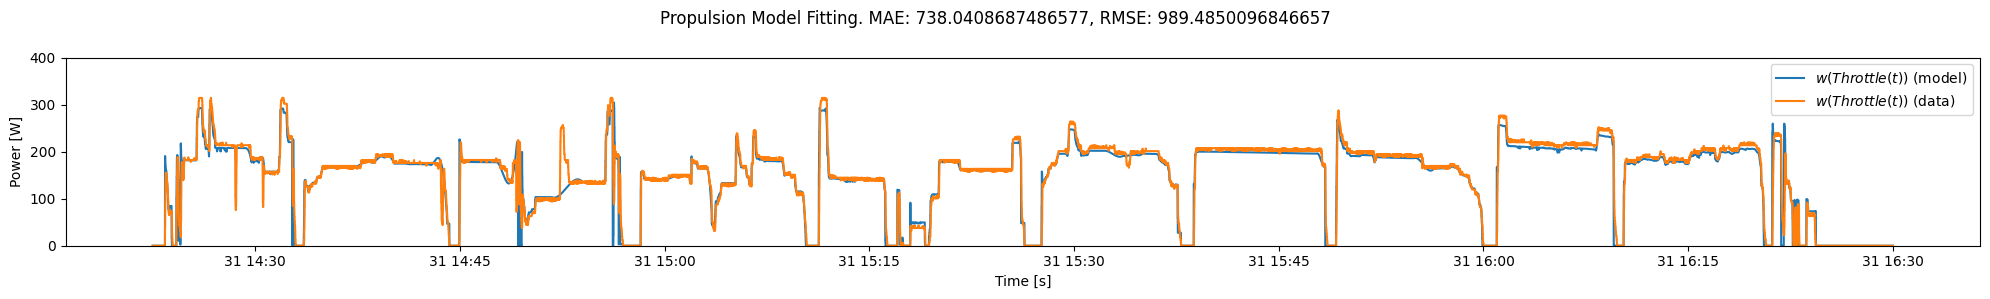

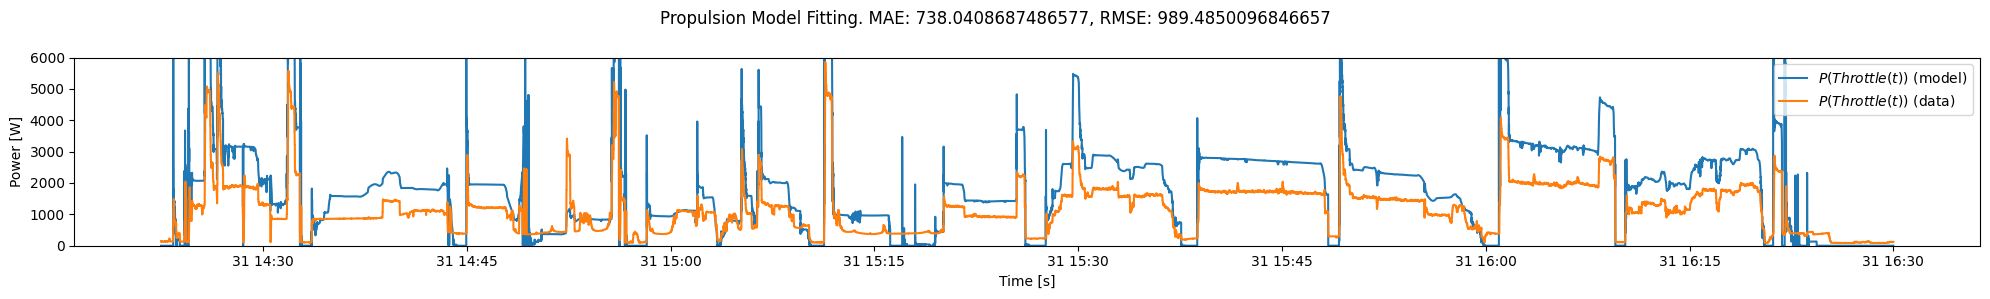

In [ ]:
df['esc_pi'] = df['esc_ii'] * df['bat_v']
df_best['esc_pi'] = df_best['esc_ii'].to_numpy() * df['bat_v'].to_numpy()
df_init['esc_pi'] = df_init['esc_ii'].to_numpy() * df['bat_v'].to_numpy()

rmse = (((df['esc_pi'].to_numpy() - df_best['esc_pi'].to_numpy())**2).sum() / len(df))**(1/2)
mae = abs(df['esc_pi'].to_numpy() - df_best['esc_pi'].to_numpy()).sum() / len(df)

plt.figure(figsize=(20, 3))
plt.scatter(df['esc_dt'], df['esc_pi'], label='data', s=0.2)
# plt.scatter(df['esc_dt'], df_init['esc_pi'], label='model', s=0.5)
# plt.scatter(df['esc_dt'], df_best['esc_pi'], label='model', s=0.5)
plt.xlabel('Throttle [%]')
plt.ylabel('Power [W]')
plt.legend(loc=0)
plt.suptitle('Power vs Throttle')
plt.ylim([0,6000])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
# plt.scatter(df['esc_dt'], df_init['esc_pi'], label='model', s=0.5)
plt.scatter(df['esc_dt'], df_best['esc_pi'], label='model', s=0.5)
plt.scatter(df['esc_dt'], df['esc_pi'], label='data', s=0.2)
plt.xlabel('Throttle [%]')
plt.ylabel('Power [W]')
plt.legend(loc=0)
plt.suptitle('Power vs Throttle')
plt.ylim([0,6000])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
# plt.plot(df.index, df_init['esc_ii'], label='$I(Throttle(t))$ (model)')
plt.plot(df.index, df_best['esc_ii'], label='$I(Throttle(t))$ (model)')
plt.plot(df.index, df['esc_ii'], label='$I(Throttle(t))$ (data)')
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.legend(loc=1)
plt.suptitle(f"Propulsion Model Fitting. MAE: {mae}, RMSE: {rmse}")
plt.ylim([0,180])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
# plt.plot(df.index, df_init['motor_w'], label='$I(Throttle(t))$ (model)')
plt.plot(df.index, df_best['motor_w'], label='$w(Throttle(t))$ (model)')
plt.plot(df.index, df['motor_wo'], label='$w(Throttle(t))$ (data)')
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.legend(loc=1)
plt.suptitle(f"Propulsion Model Fitting. MAE: {mae}, RMSE: {rmse}")
plt.ylim([0,400])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
# plt.plot(df.index, df_init['esc_pi'], label='$P(Throttle(t))$ (model)')
plt.plot(df.index, df_best['esc_pi'], label='$P(Throttle(t))$ (model)')
plt.plot(df.index, df['esc_pi'], label='$P(Throttle(t))$ (data)')
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.legend(loc=1)
plt.suptitle(f"Propulsion Model Fitting. MAE: {mae}, RMSE: {rmse}")
plt.ylim([0,6000])
plt.tight_layout()
plt.show()